### ABOUT DATASET
This dataset was generously provided public by Olist - the Brazilian marketplace. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners.

The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

#### Import Libraries

In [246]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from unidecode import unidecode

#### Overview of Brazilian Dataset

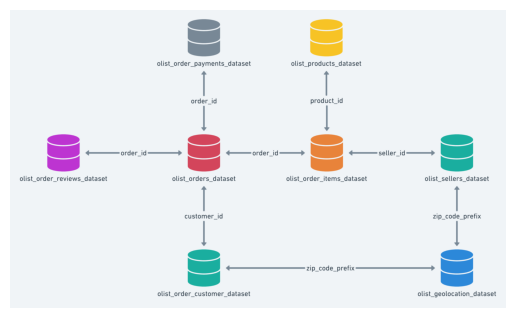

In [2]:
image_path = "C:/Users/Admin/Documents/Vin/Dataset/dataset.png"
image = mpimg.imread(image_path)
plt.imshow(image)
plt.axis('off') 
plt.show()

#### Load Dataset

In [259]:
customers = pd.read_csv("C:/Users/Admin/Documents/Vin/Dataset/olist_customers_dataset.csv")
geolocation= pd.read_csv("C:/Users/Admin/Documents/Vin/Dataset/olist_geolocation_dataset.csv")
order_items = pd.read_csv("C:/Users/Admin/Documents/Vin/Dataset/olist_order_items_dataset.csv")
order_payments = pd.read_csv("C:/Users/Admin/Documents/Vin/Dataset/olist_order_payments_dataset.csv")
order_reviews = pd.read_csv("C:/Users/Admin/Documents/Vin/Dataset/olist_order_reviews_dataset.csv")
date_cols = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
orders = pd.read_csv("C:/Users/Admin/Documents/Vin/Dataset/olist_orders_dataset.csv",parse_dates=date_cols)
products = pd.read_csv("C:/Users/Admin/Documents/Vin/Dataset/olist_products_dataset.csv")
sellers = pd.read_csv("C:/Users/Admin/Documents/Vin/Dataset/olist_sellers_dataset.csv")
product_cat = pd.read_csv("C:/Users/Admin/Documents/Vin/Dataset/product_category_name_translation.csv")

Overview of Tables quality in Dataset

In [260]:
def overview_data(table_name):
                #   , null_amount, name_null_cols, num_null_cols):
    nrows=table_name.shape[0]
    ncols=table_name.shape[1]
    null_values = table_name.isnull().sum()    
    name_nul_cols = []
    dups = [table_name.duplicated().sum()]
    for i in range(len(null_values)):
        if null_values[i] >0:
            name_nul_cols.append(null_values.index[i])    
    num_nul_cols = len(name_nul_cols)
    return nrows, ncols , name_nul_cols,num_nul_cols, dups

In [ ]:
detailed_db = pd.DataFrame()
list_dataset= [customers,geolocation,order_items,order_payments,order_reviews,orders,products,sellers]
list_dataset_name= ['customers','geolocation','order_items','order_payments','order_reviews','orders','products','sellers']
detailed_db['table_name'] = [i for i in list_dataset_name]
detailed_db['no_rows'] = [overview_data(i)[0] for i in list_dataset]
detailed_db['n_cols'] = [overview_data(i)[1] for i in list_dataset]
detailed_db['names_of_null_cols'] = [', '.join(overview_data(i)[2]) for i in list_dataset]
detailed_db['num_null_cols'] = [overview_data(i)[3] for i in list_dataset]
detailed_db['num_dups'] = [overview_data(i)[4] for i in list_dataset]
detailed_db

,table_name,no_rows,n_cols,names_of_null_cols,num_null_cols,num_dups
0,customers,99441,5,,0,[0]
1,geolocation,1000163,5,,0,[261831]
2,order_items,112650,7,,0,[0]
3,order_payments,103886,5,,0,[0]
4,order_reviews,100000,7,"review_comment_title, review_comment_message",2,[0]
5,orders,99441,8,"order_approved_at, order_delivered_carrier_dat...",3,[0]
6,products,32951,9,"product_category_name, product_name_lenght, pr...",8,[0]
7,sellers,3095,4,,0,[0]


#### Check null each tables

In [12]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                100000 non-null  object
 1   order_id                 100000 non-null  object
 2   review_score             100000 non-null  int64 
 3   review_comment_title     11715 non-null   object
 4   review_comment_message   41753 non-null   object
 5   review_creation_date     100000 non-null  object
 6   review_answer_timestamp  100000 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [276]:
orders.loc[orders['order_delivered_customer_date'].isnull(), 'order_status'].unique()

array(['invoiced', 'shipped', 'processing', 'unavailable', 'canceled',
       'delivered', 'created', 'approved'], dtype=object)

In [280]:
orders.loc[orders['order_delivered_customer_date'].isnull() & (orders['order_status'] == 'delivered')]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


In [14]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


### Data Clean

In [17]:
geolocation['geolocation_city'].value_counts()

sao paulo               135800
rio de janeiro           62151
belo horizonte           27805
são paulo                24918
curitiba                 16593
                         ...  
jacuípe                      1
mar vermelho                 1
quebrangulo                  1
poço das trincheiras         1
poxim                        1
Name: geolocation_city, Length: 8011, dtype: int64

#### We had some value is non-encode, so we need to convert it to encode.

In [18]:
geolocation['geolocation_city'].unique()

array(['sao paulo', 'são paulo', 'sao bernardo do campo', ..., 'ciríaco',
       'estação', 'vila lângaro'], dtype=object)

In [19]:
geolocation['geolocation_city'] =  geolocation['geolocation_city'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)
geolocation['geolocation_city'].value_counts()

sao paulo                160718
rio de janeiro            62151
belo horizonte            27805
curitiba                  16593
porto alegre              13521
                          ...  
olho dagua grande             1
paiquere                      1
poxim                         1
sao jose dos salgados         1
vera cruz de minas            1
Name: geolocation_city, Length: 5969, dtype: int64

- After converting, unique values decrease 5969 values.

In [267]:
special_delimiters = r'[,:\*\.;]'
geolocation[geolocation['geolocation_city'].str.contains(special_delimiters)]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
421038,21032,-22.857779,-43.252626,"rio de janeiro, rio de janeiro, brasil",RJ
525385,28930,-22.969370,-42.029834,...arraial do cabo,RJ
698306,47220,-9.517593,-43.014366,"campo alegre de lourdes, bahia, brasil",BA
851430,81470,-25.571748,-49.334374,* cidade,PR
896733,87365,-24.271860,-53.069433,4o. centenario,PR
900755,88058,-27.450674,-48.401693,florian&oacute;polis,SC


In [21]:
geolocation.loc[(geolocation['geolocation_state'] == 'RJ') & (geolocation['geolocation_city'].str.contains('^rio', case=False)),['geolocation_city','geolocation_state']].drop_duplicates().sort_values(by='geolocation_city')

,geolocation_city,geolocation_state
519269,rio bonito,RJ
506518,rio claro,RJ
507884,rio das flores,RJ
519267,rio das ostras,RJ
404270,rio de janeiro,RJ
421038,"rio de janeiro, rio de janeiro, brasil",RJ
444634,rio janeiro,RJ


In [22]:
geolocation.loc[(geolocation['geolocation_state'] == 'RJ') & (geolocation['geolocation_city'].str.contains('^..', case=False)),['geolocation_city','geolocation_state']].drop_duplicates().sort_values(by='geolocation_city')

,geolocation_city,geolocation_state
491149,'teresopolis,RJ
525385,...arraial do cabo,RJ
490133,afonso arinos,RJ
508321,andrade pinto,RJ
467435,angra dos reis,RJ
...,...,...
513631,vila nova de campos,RJ
518896,visconde de imbe,RJ
506763,visconde de maua,RJ
503012,volta redonda,RJ


In [23]:
geolocation.loc[(geolocation['geolocation_state'] == 'PR') & (geolocation['geolocation_city'].str.contains('^cidade', case=False)),['geolocation_city','geolocation_state']].drop_duplicates().sort_values(by='geolocation_city')

,geolocation_city,geolocation_state
899272,cidade gaucha,PR


In [24]:
geolocation.loc[(geolocation['geolocation_state'] == 'PR') & (geolocation['geolocation_city'].str.contains('^cidade', case=False)),['geolocation_city','geolocation_state']].drop_duplicates().sort_values(by='geolocation_city')

,geolocation_city,geolocation_state
899272,cidade gaucha,PR


In [25]:
geolocation.loc[(geolocation['geolocation_state'] == 'PR') & (geolocation['geolocation_city'].str.contains('^4o', case=False)),['geolocation_city','geolocation_state']].drop_duplicates().sort_values(by='geolocation_city')

,geolocation_city,geolocation_state
896977,4o centenario,PR
896733,4o. centenario,PR


In [26]:
geolocation.loc[(geolocation['geolocation_state'] == 'SC') & (geolocation['geolocation_city'].str.contains('^florian', case=False)),['geolocation_city','geolocation_state']].drop_duplicates().sort_values(by='geolocation_city')

,geolocation_city,geolocation_state
900755,florian&oacute;polis,SC
899986,florianopolis,SC


In [27]:
replacements = {
    'rio de janeiro, rio de janeiro, brasil': 'rio de janeiro',
    '...arraial do cabo': 'arraial do cabo',
    'campo alegre de lourdes, bahia, brasil' : 'campo alegre de lourdes',
    '* cidade' : 'cidade gaucha',
    '4o. centenario' : '4o centenario',
    'florian&oacute;polis' : 'florianopolis'
}

geolocation['geolocation_city'] = geolocation['geolocation_city'].replace(replacements)

In [28]:
geolocation.shape

(1000163, 5)

#### Duplicate
There are 279667 duplicated values, so i will remove them.

In [29]:
geolocation.duplicated().sum()

279667

In [30]:
geolocation.drop_duplicates(inplace=True)

In [31]:
geolocation.duplicated().sum()

0

In [32]:
geolocation.shape

(720496, 5)

In [33]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720496 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  720496 non-null  int64  
 1   geolocation_lat              720496 non-null  float64
 2   geolocation_lng              720496 non-null  float64
 3   geolocation_city             720496 non-null  object 
 4   geolocation_state            720496 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.0+ MB


In [34]:
geolocation['geolocation_zip_code_prefix'].value_counts()

38400    746
11680    727
35500    726
11740    666
36400    627
        ... 
13319      1
13355      1
91810      1
91782      1
6633       1
Name: geolocation_zip_code_prefix, Length: 19015, dtype: int64

In [268]:
check_dup_zip_code = geolocation[geolocation['geolocation_zip_code_prefix'] > 1].sort_values(by='geolocation_zip_code_prefix')
check_dup_zip_code

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
1246,1001,-23.549292,-46.633559,sao paulo,SP
429,1001,-23.550498,-46.634338,sao paulo,SP
1182,1001,-23.549779,-46.633957,sao paulo,SP
1435,1001,-23.549292,-46.633559,sao paulo,SP
326,1001,-23.551427,-46.634074,sao paulo,SP
...,...,...,...,...,...
1000026,99980,-28.388679,-51.848863,david canabarro,RS
999950,99980,-28.388400,-51.845225,david canabarro,RS
1000002,99980,-28.388342,-51.845194,david canabarro,RS
999864,99990,-28.329472,-51.769109,muliterno,RS


In [36]:
check_dup_zip_code.groupby(['geolocation_city','geolocation_zip_code_prefix']).size()

geolocation_city     geolocation_zip_code_prefix
'teresopolis         25970                           1
4o centenario        87365                           3
abadia de goias      75345                           7
abadia dos dourados  38540                          21
abadiania            72940                          23
                                                    ..
xique-xique          47400                          60
zabele               58515                           3
zacarias             15265                          12
ze doca              65365                          32
zortea               89633                          11
Length: 19608, dtype: int64

- As we can see, with one zip_code familiar with one city, we have a lot of lattitute and longtatute, so we have duplicated zip_code. To fix this, i wil get average value of 2 measure.

In [37]:
geolocation_lat_mean = geolocation.groupby('geolocation_zip_code_prefix')['geolocation_lat'].transform('mean')
geolocation_lng_mean = geolocation.groupby('geolocation_zip_code_prefix')['geolocation_lng'].transform('mean')

# Cập nhật các cột Lat và Lng trực tiếp
geolocation['geolocation_lat'] = geolocation_lat_mean
geolocation['geolocation_lng'] = geolocation_lng_mean

In [38]:
geolocation.duplicated().sum()

700883

In [39]:
geolocation.drop_duplicates(inplace=True)

In [40]:
geolocation.duplicated().sum()

0

In [41]:
check_dup_zip_code.groupby(['geolocation_city','geolocation_zip_code_prefix']).size()

geolocation_city     geolocation_zip_code_prefix
'teresopolis         25970                           1
4o centenario        87365                           3
abadia de goias      75345                           7
abadia dos dourados  38540                          21
abadiania            72940                          23
                                                    ..
xique-xique          47400                          60
zabele               58515                           3
zacarias             15265                          12
ze doca              65365                          32
zortea               89633                          11
Length: 19608, dtype: int64

In [42]:
geolocation['geolocation_zip_code_prefix'].value_counts()

89610    4
13454    4
65935    4
45936    4
17970    4
        ..
20230    1
20250    1
20260    1
20056    1
99952    1
Name: geolocation_zip_code_prefix, Length: 19015, dtype: int64

In [43]:
check_dup_zip_code = geolocation[geolocation['geolocation_zip_code_prefix'] == 45936]
check_dup_zip_code

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
694783,45936,-14.767869,-39.278098,itabatan,BA
694790,45936,-14.767869,-39.278098,itabata,BA
695026,45936,-14.767869,-39.278098,mucuri,BA
695077,45936,-14.767869,-39.278098,itabatan (mucuri),BA


In [44]:
## Update error syntax in city
geolocation_city_first = geolocation.groupby('geolocation_zip_code_prefix')['geolocation_city'].transform('first')
# geolocation_lng_mean = geolocation.groupby('geolocation_zip_code_prefix')['geolocation_lng'].transform('mean')

geolocation['geolocation_city'] = geolocation_city_first


In [45]:
geolocation.duplicated().sum()

590

In [46]:
geolocation.drop_duplicates(inplace=True)

In [47]:
geolocation['geolocation_zip_code_prefix'].value_counts()

78557    2
2116     2
21550    2
4011     2
23056    2
        ..
19907    1
19911    1
19908    1
19940    1
99952    1
Name: geolocation_zip_code_prefix, Length: 19015, dtype: int64

In [48]:
check_dup_zip_code = geolocation[geolocation['geolocation_zip_code_prefix'].isin(geolocation['geolocation_zip_code_prefix'].value_counts()[geolocation['geolocation_zip_code_prefix'].value_counts() > 1].index)]
check_dup_zip_code

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
21728,2116,-23.520517,-46.585632,sao paulo,SP
22261,2116,-23.520517,-46.585632,sao paulo,RN
71032,4011,-23.579494,-46.644351,sao paulo,SP
72852,4011,-23.579494,-46.644351,sao paulo,AC
430342,21550,-22.862106,-43.356537,rio de janeiro,RJ
430999,21550,-22.862106,-43.356537,rio de janeiro,AC
459234,23056,-22.918154,-43.610135,rio de janeiro,RJ
460406,23056,-22.918154,-43.610135,rio de janeiro,AC
792362,72915,-15.356047,-48.067688,aguas lindas de goias,GO
792394,72915,-15.356047,-48.067688,aguas lindas de goias,DF


In [49]:
replacements = {
    'sao paulo': 'SP',
    'sinop': 'MT',
    'rio de janeiro' : 'RT',
    'aguas lindas de goias' : 'GO',
    'nova andradina' : 'MS',
    'curitiba' : 'PR'
}

geolocation.loc[geolocation['geolocation_city'].isin(replacements.keys()),'geolocation_state'] = geolocation['geolocation_city'].replace(replacements)

In [50]:
geolocation.duplicated().sum()

8

In [51]:
geolocation.drop_duplicates(inplace=True)

In [52]:
geolocation['geolocation_zip_code_prefix'].value_counts()

1037     1
62030    1
62016    1
62020    1
62031    1
        ..
19907    1
19911    1
19908    1
19940    1
99952    1
Name: geolocation_zip_code_prefix, Length: 19015, dtype: int64

In [53]:
check_dup_zip_code = geolocation[geolocation['geolocation_zip_code_prefix'].isin(geolocation['geolocation_zip_code_prefix'].value_counts()[geolocation['geolocation_zip_code_prefix'].value_counts() > 1].index)]
check_dup_zip_code

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state


In [54]:
geolocation

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545497,-46.639136,sao paulo,SP
1,1046,-23.545839,-46.643722,sao paulo,SP
3,1041,-23.544053,-46.639868,sao paulo,SP
4,1035,-23.541772,-46.641307,sao paulo,SP
5,1012,-23.547808,-46.634844,sao paulo,SP
...,...,...,...,...,...
999774,99955,-28.112686,-52.144697,vila langaro,RS
999780,99970,-28.343920,-51.874988,ciriaco,RS
999786,99910,-27.857786,-52.070728,floriano peixoto,RS
999803,99920,-27.855254,-52.300906,erebango,RS


### Prepare Data

In [61]:
order_item = order_items.groupby(['order_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']).size().rename('number_products').reset_index()

#### Calculate total order values

In [64]:
order_item['total_value'] = (order_item['freight_value']+ order_item['price'])*order_item['number_products']

In [65]:
order_item

,order_id,product_id,seller_id,shipping_limit_date,price,freight_value,number_products,total_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,218.04
...,...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1,343.40
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1,386.53
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1,116.85
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1,64.71


In [194]:
# Merging multiple DataFrames into a single DataFrame 'df' using left joins
df = pd.merge(orders, customers, on='customer_id', how='left')
df = df.merge(order_item, on='order_id', how='left')
df = df.merge(sellers, on='seller_id', how='left')
df = df.merge(products, on='product_id', how='left')
df = df.merge(product_cat, on='product_category_name', how='left')
# df = df.merge(df_order_payments, on='order_id', how='left')
# df = df.merge(df_order_reviews, on='order_id', how='left')

print('Merge Data Shape:',df.shape)
display(df.head())

Merge Data Shape: (103200, 31)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,MG,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,SP,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


In [89]:
df['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [234]:
df['order_purchase_date'] = df['order_purchase_timestamp'].dt.strftime('%Y-%m')
df['weekday'] = df['order_purchase_timestamp'].dt.day_name() #day of week in str
df['year'] = df['order_purchase_timestamp'].dt.year #year
df['monthday'] = df['order_purchase_timestamp'].dt.day #day of month
df['weekday'] = df['order_purchase_timestamp'].dt.weekday #day of week as int (0=Monday, 1=Tuesday,...)
df['month'] = df['order_purchase_timestamp'].dt.month #month
df['hour'] = df['order_purchase_timestamp'].dt.hour #hour

In [144]:
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_purchase_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery,2018-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103195,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,...,beleza_saude,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0,health_beauty,2017-03
103196,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby,2018-02
103197,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2,2017-08
103198,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories,2018-01


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103200 entries, 0 to 103199
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103200 non-null  object        
 1   customer_id                    103200 non-null  object        
 2   order_status                   103200 non-null  object        
 3   order_purchase_timestamp       103200 non-null  datetime64[ns]
 4   order_approved_at              103040 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101398 non-null  datetime64[ns]
 6   order_delivered_customer_date  100195 non-null  datetime64[ns]
 7   order_estimated_delivery_date  103200 non-null  datetime64[ns]
 8   customer_unique_id             103200 non-null  object        
 9   customer_zip_code_prefix       103200 non-null  int64         
 10  customer_city                  103200 non-null  object        
 11  

### 1. Metric: Total order value
- total order value (GMV) = (order price + freight value) * number of products
 
I will show this metric by dynamic dimensions

#### 1.1 By status and yearmonth

In [104]:
df1 = df.groupby(['order_status','order_purchase_date'])['total_value'].sum()

df1 = df1.reset_index()
df1

,order_status,order_purchase_date,total_value
0,approved,2017-02,61.62
1,approved,2017-04,179.46
2,canceled,2016-09,75.06
3,canceled,2016-10,3313.83
4,canceled,2017-01,245.03
...,...,...,...
131,unavailable,2018-04,0.00
132,unavailable,2018-05,0.00
133,unavailable,2018-06,0.00
134,unavailable,2018-07,0.00


In [ ]:

# Giả sử bạn có DataFrame 'df' với cột 'order_status' và 'order_count'
order_counts = df.groupby('order_status')['order_count'].sum()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
order_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Phân bổ số lượng đơn hàng theo trạng thái')
plt.axis('equal')
plt.legend(labels=order_counts.index, loc='upper left')
plt.show()

In [105]:
df1 = df1.pivot_table(index='order_purchase_date', columns='order_status', values='total_value', fill_value=0)
df1

order_status,approved,canceled,created,delivered,invoiced,processing,shipped,unavailable
order_purchase_date,,,,,,,,
2016-09,0.00,75.06,0,143.46,0.00,0.00,136.23,0.00
2016-10,0.00,3313.83,0,46490.66,3282.22,412.62,1169.02,2140.49
2016-12,0.00,0.00,0,19.62,0.00,0.00,0.00,0.00
2017-01,0.00,245.03,0,127482.37,3981.55,2515.09,2964.45,0.00
2017-02,61.62,2718.93,0,271239.32,1326.80,6671.40,4262.55,0.00
2017-03,0.00,6430.63,0,414330.95,802.18,5875.95,4608.88,0.00
2017-04,179.46,6573.63,0,390812.40,2223.87,6165.95,6466.93,0.00
2017-05,0.00,3480.12,0,566851.40,2548.98,4270.76,9039.69,0.00
2017-06,0.00,3310.80,0,490050.37,1093.81,2665.15,5842.91,0.00


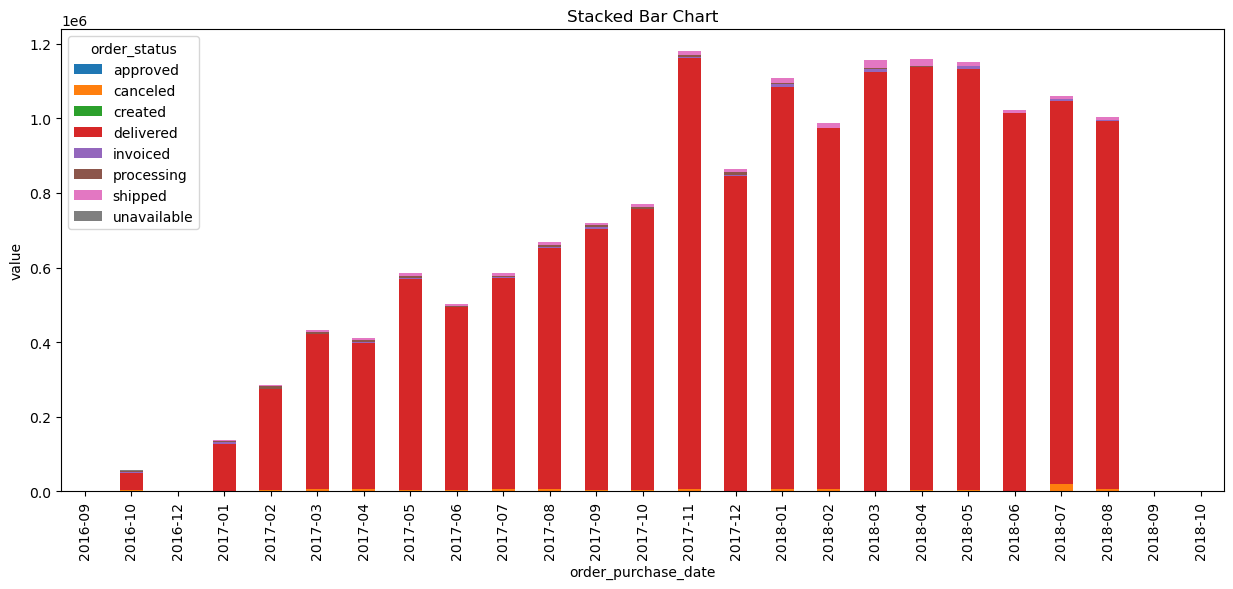

In [283]:
df1.plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Stacked Bar Chart')
plt.xlabel('order_purchase_date')
plt.ylabel('value')
plt.show()

#### 1.2 Top 10 and bottom 10 product

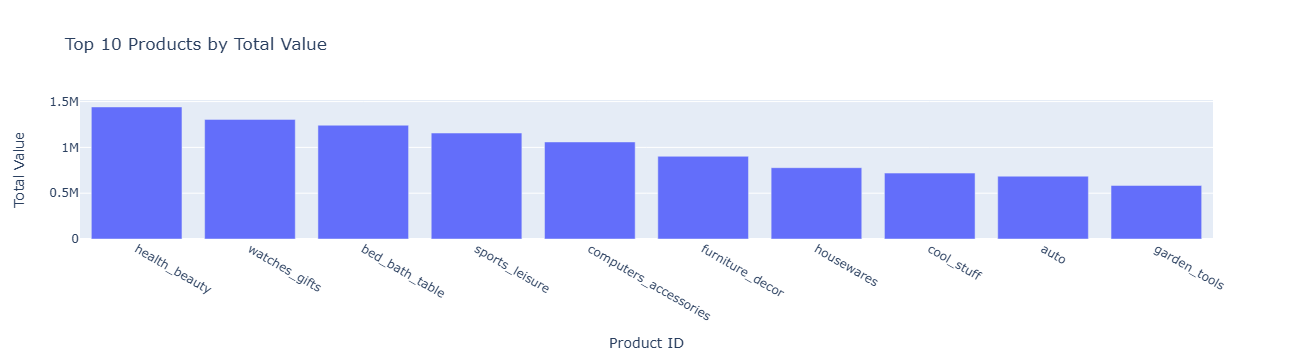

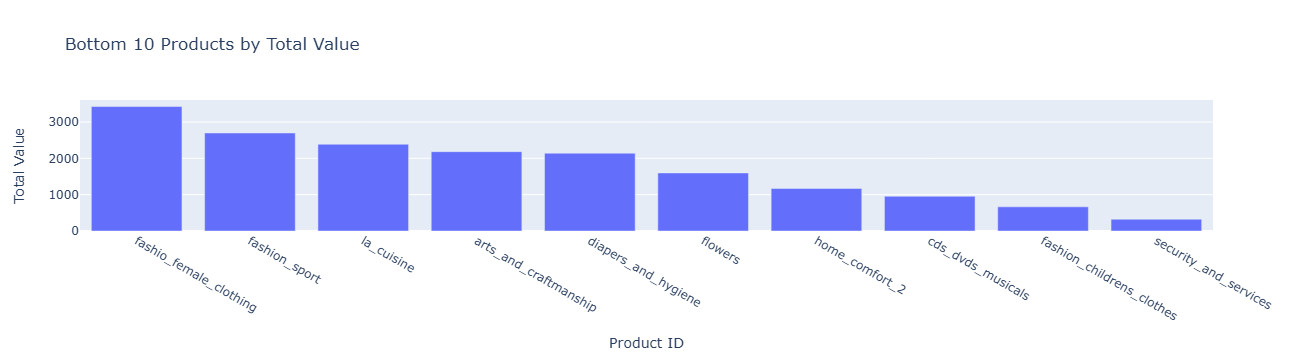

In [172]:
# Group by product_id and sum the total_value
product_totals = df.groupby('product_category_name_english')['total_value'].sum().reset_index()

# Sort the DataFrame by total_value in descending order and get the top 10 products
top_10_products = product_totals.sort_values('total_value', ascending=False).head(10)

bottom_10_products = product_totals.sort_values('total_value', ascending=False).tail(10)

# Create the top 10 products chart
top_10_fig = go.Figure(data=[go.Bar(
    x=top_10_products['product_category_name_english'],
    y=top_10_products['total_value']
)])
top_10_fig.update_layout(
    title='Top 10 Products by Total Value',
    xaxis_title='Product ID',
    yaxis_title='Total Value'
)

# Create the bottom 10 products chart
bottom_10_fig = go.Figure(data=[go.Bar(
    x=bottom_10_products['product_category_name_english'],
    y=bottom_10_products['total_value']
)])
bottom_10_fig.update_layout(
    title='Bottom 10 Products by Total Value',
    xaxis_title='Product ID',
    yaxis_title='Total Value'
)

# Display the charts
top_10_fig.show()
bottom_10_fig.show()

### 2. Total orders

#### 2.1 By status and yearmonth

In [94]:
df1 = df.groupby(['order_status','order_purchase_date']).size()
df1 = df1.reset_index()
df1 = df1.rename(columns={df1.columns[2]: 'total_orders'})
df1

,order_status,order_purchase_date,total_orders
0,approved,2017-02,1
1,approved,2017-04,1
2,canceled,2016-09,2
3,canceled,2016-10,25
4,canceled,2017-01,3
...,...,...,...
131,unavailable,2018-04,5
132,unavailable,2018-05,16
133,unavailable,2018-06,4
134,unavailable,2018-07,18


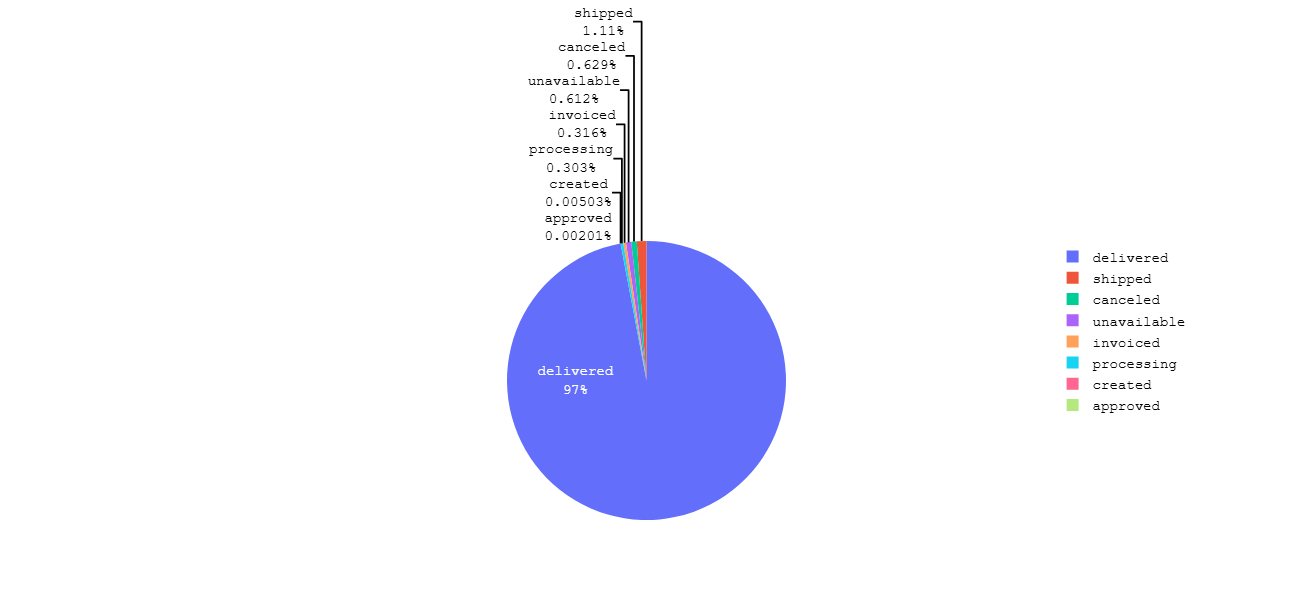

In [166]:
import plotly.graph_objects as go
order_counts = df.groupby('order_status')['order_id'].nunique()
labels = order_counts.index.values
values = order_counts.values

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.update_layout(
    width=800,  # Set the width of the chart
    height=600,  # Set the height of the chart
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="black"
    )
)
fig.show()

In [98]:
df1 = df1.pivot_table(index='order_purchase_date', columns='order_status', values='total_orders', fill_value=0)
df1

order_status,approved,canceled,created,delivered,invoiced,processing,shipped,unavailable
order_purchase_date,,,,,,,,
2016-09,0,2,0,1,0,0,2,0
2016-10,0,25,0,279,21,2,8,8
2016-12,0,0,0,1,0,0,0,0
2017-01,0,3,0,785,12,9,16,10
2017-02,1,17,0,1711,11,33,22,45
2017-03,0,34,0,2633,3,24,46,32
2017-04,1,18,0,2376,14,10,51,9
2017-05,0,30,0,3686,17,23,56,31
2017-06,0,16,0,3246,12,12,48,24


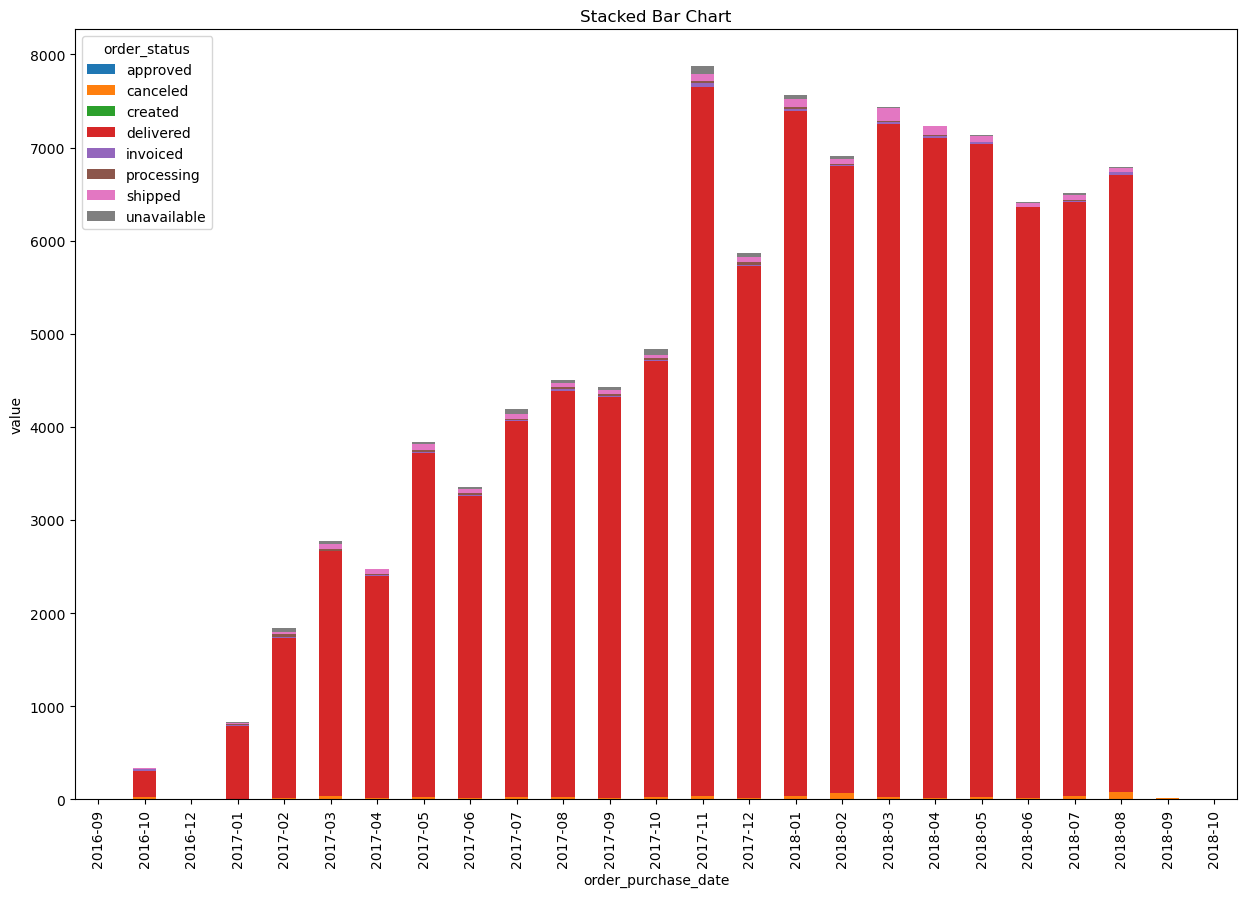

In [100]:

# Tạo biểu đồ cột chồng
df1.plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Stacked Bar Chart')
plt.xlabel('order_purchase_date')
plt.ylabel('value')
plt.show()

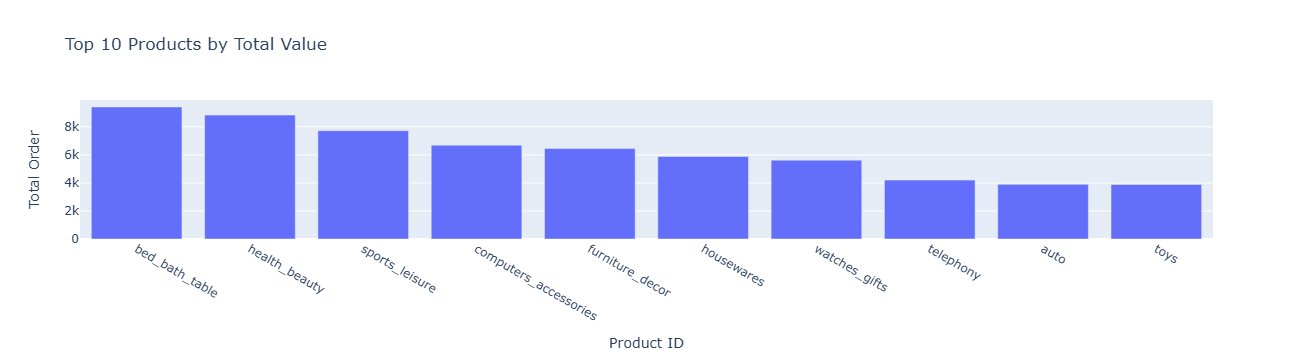

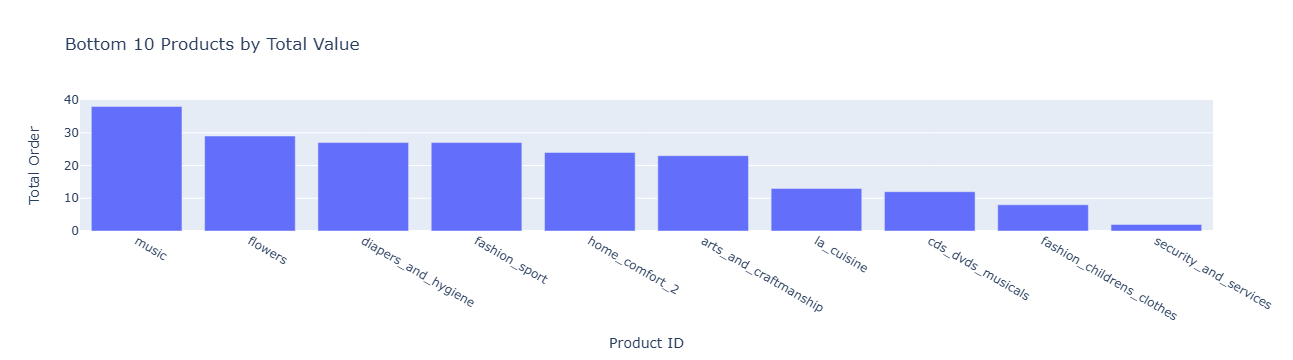

In [173]:
# Group by product_id and sum the total_value
product_totals = df.groupby('product_category_name_english')['order_id'].nunique().reset_index()

# Sort the DataFrame by total_value in descending order and get the top 10 products
top_10_products = product_totals.sort_values('order_id', ascending=False).head(10)

bottom_10_products = product_totals.sort_values('order_id', ascending=False).tail(10)

# Create the top 10 products chart
top_10_fig = go.Figure(data=[go.Bar(
    x=top_10_products['product_category_name_english'],
    y=top_10_products['order_id']
)])
top_10_fig.update_layout(
    title='Top 10 Products by Total Value',
    xaxis_title='Product ID',
    yaxis_title='Total Order'
)

# Create the bottom 10 products chart
bottom_10_fig = go.Figure(data=[go.Bar(
    x=bottom_10_products['product_category_name_english'],
    y=bottom_10_products['order_id']
)])
bottom_10_fig.update_layout(
    title='Bottom 10 Products by Total Value',
    xaxis_title='Product ID',
    yaxis_title='Total Order'
)

# Display the charts
top_10_fig.show()
bottom_10_fig.show()

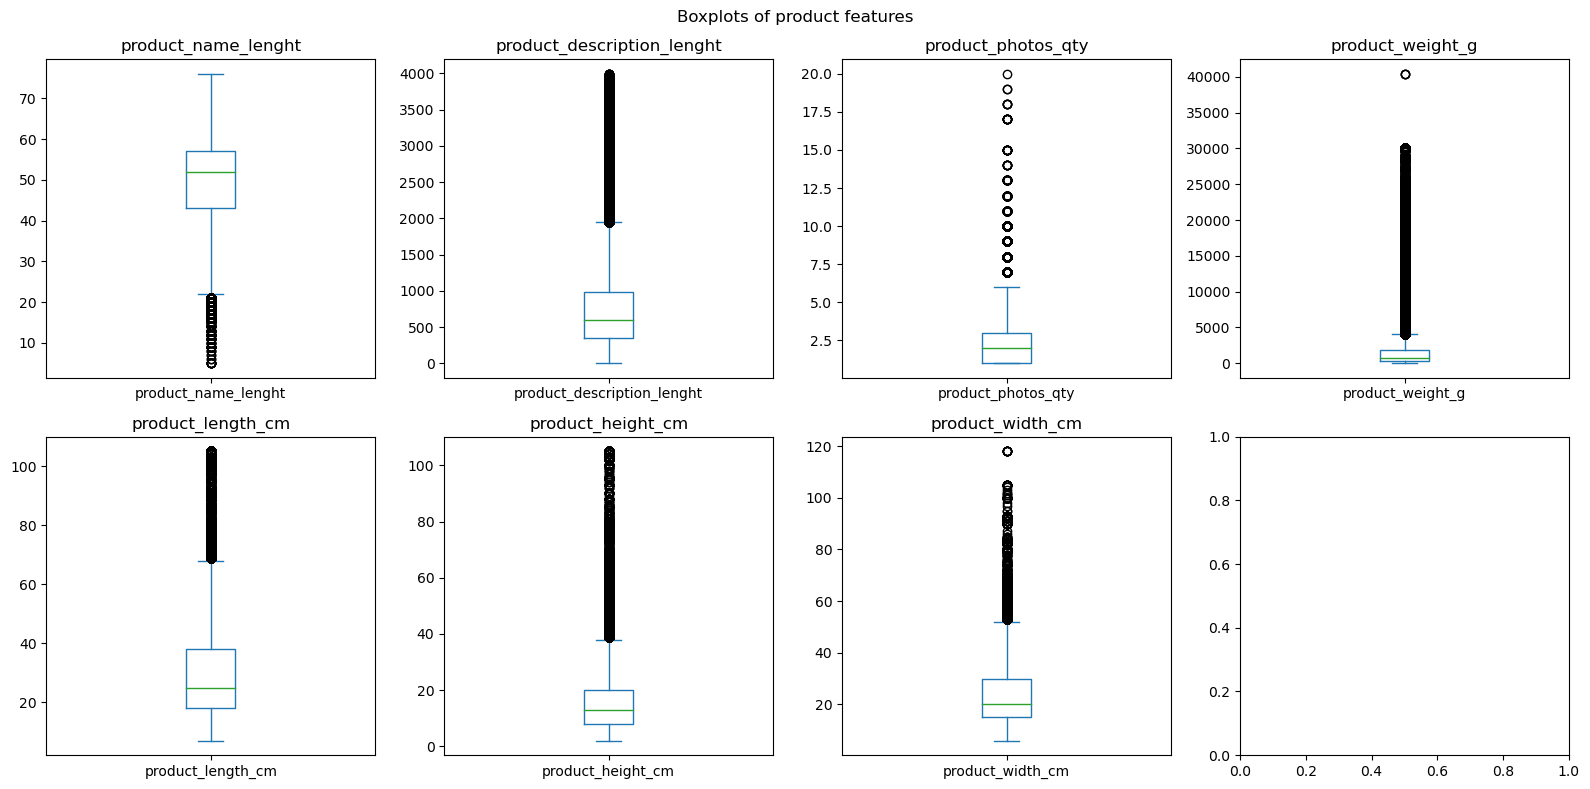

In [229]:
df_boxplot = df[['product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']]
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

for i, ax in enumerate(axes.flat):
    if i < len(df_boxplot.columns):
        df_boxplot[df_boxplot.columns[i]].plot(kind='box', ax=ax)
        ax.set_title(df_boxplot.columns[i])
    
plt.suptitle('Boxplots of product features')
plt.tight_layout()
plt.show()

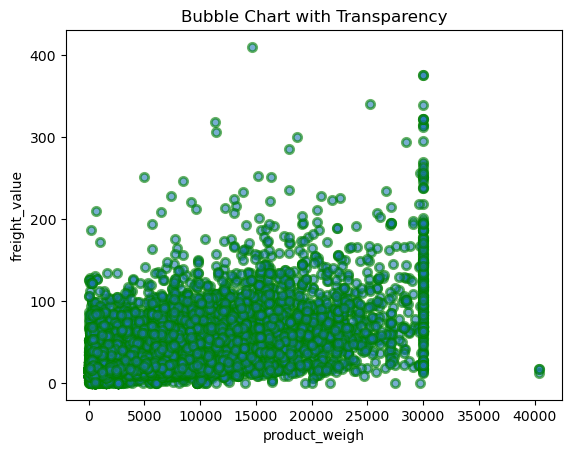

In [294]:


import matplotlib.pyplot as plt
 
# Data
x_values = df['product_weight_g']
y_values = df['freight_value']
# bubble_sizes = df['product_weight_g']
 
# Create a bubble chart with customization
plt.scatter(x_values, y_values,  alpha=0.6, edgecolors='g', linewidths=2)
 
# Add title and axis labels
plt.title("Bubble Chart with Transparency")
plt.xlabel("product_weigh")
plt.ylabel("freight_value")
 
# Display the plot
plt.show()

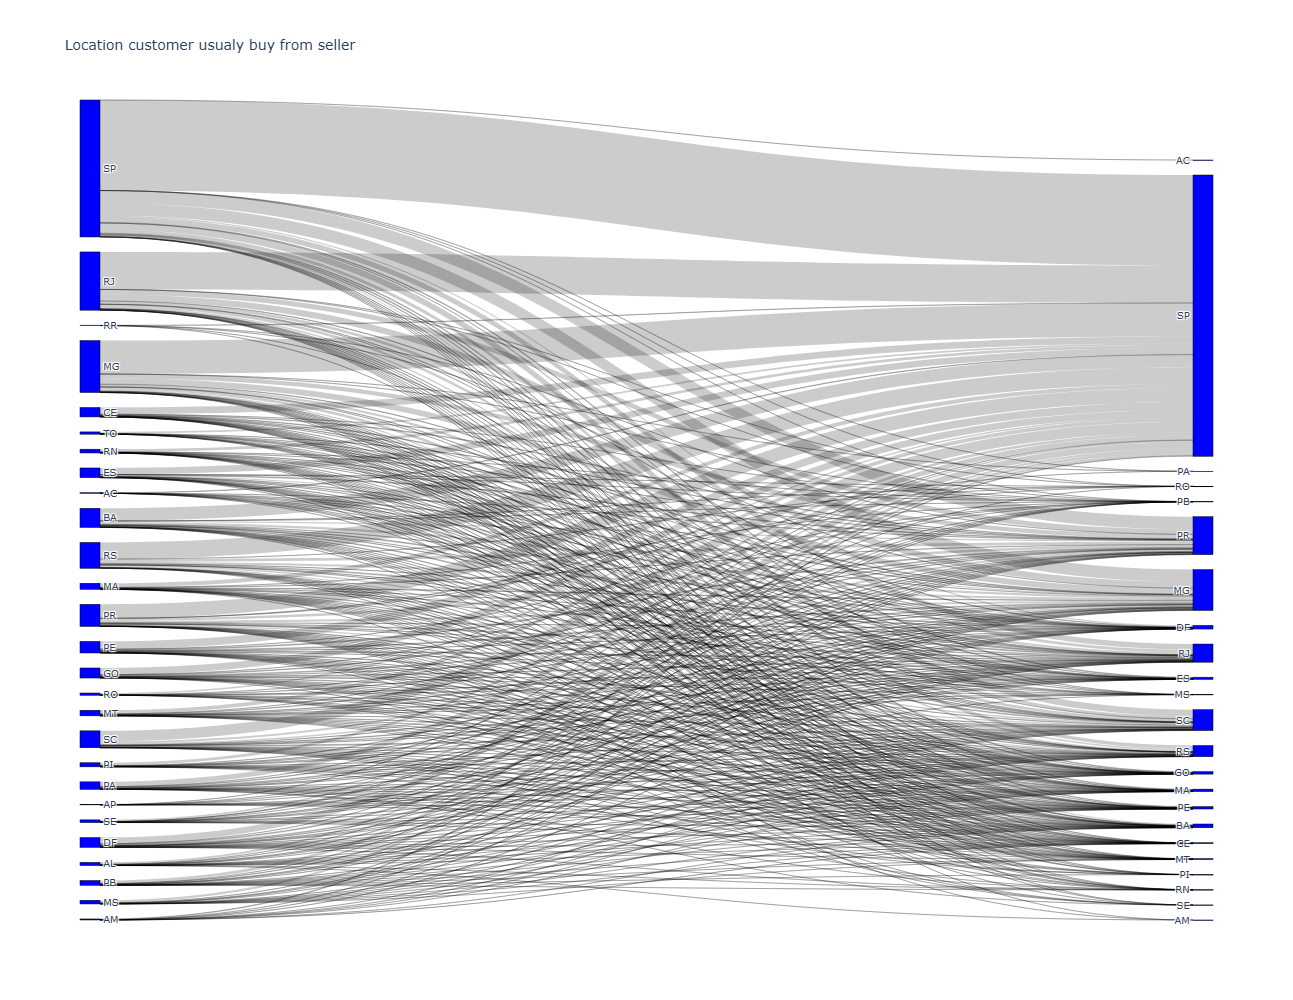

In [233]:

sankey_data = df.groupby(['customer_state', 'seller_state'])['freight_value'].sum().reset_index()

# Get the unique values for customer_state and seller_state
customer_states = sankey_data['customer_state'].unique()
seller_states = sankey_data['seller_state'].unique()

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=list(customer_states) + list(seller_states),
        color="blue"
    ),
    link=dict(
        source=[list(customer_states).index(x) for x in sankey_data['customer_state']],
        target=[len(customer_states) + list(seller_states).index(y) for y in sankey_data['seller_state']],
        value=sankey_data['freight_value'],
        label=[f"From {sankey_data['customer_state'][i]} to {sankey_data['seller_state'][i]}" for i in range(len(sankey_data))]
    )
)])

fig.update_layout(title_text="Location customer usualy buy from seller", font_size=10,width=1300,  # Set the width of the chart
    height=1000)
fig.show()

In [235]:
day_hour = df.groupby(['weekday','hour']).agg({'order_id':'count'}).rename(columns={'order_id':'freq'}).reset_index()

In [236]:
weekmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}
day_hour.weekday = day_hour.weekday.map(weekmap)
day_hour.head()

,weekday,hour,freq
0,Mon,0,344
1,Mon,1,139
2,Mon,2,70
3,Mon,3,37
4,Mon,4,21


In [237]:
day_hour=day_hour.pivot(index = 'weekday', columns = 'hour', values = 'freq')

Text(0.5, 1.0, 'Heatmap of orders over the hour by day')

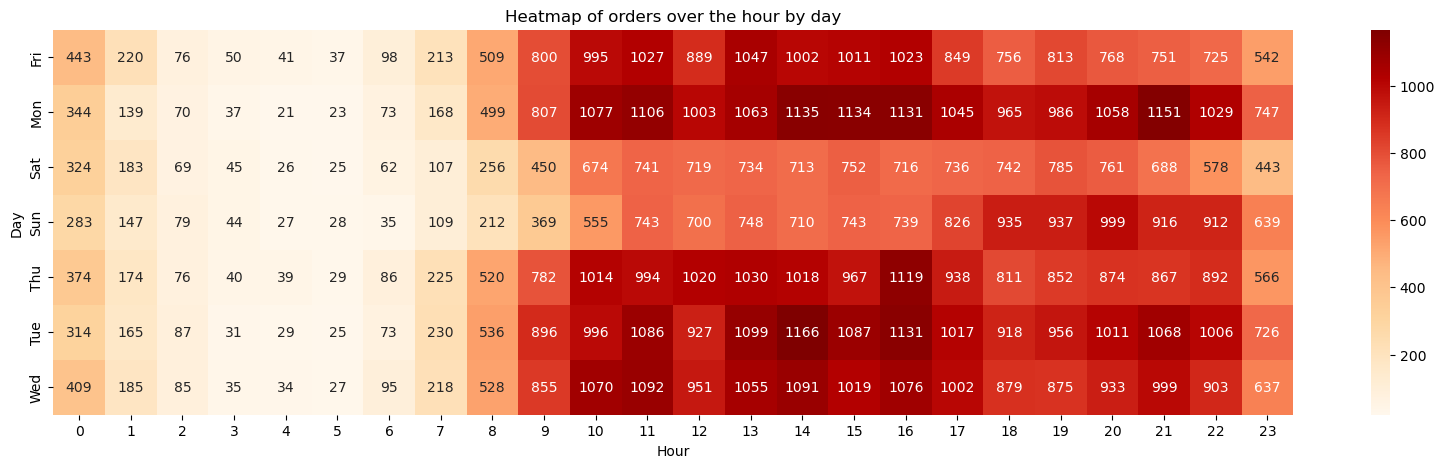

In [240]:
plt.figure(figsize=(20, 5))
ax=sns.heatmap(day_hour, annot = True, fmt = "d", cmap = "OrRd")
ax.set_xlabel("Hour")
ax.set_ylabel("Day")
ax.set_title("Heatmap of orders over the hour by day")

#### Delivery time analyst

In [256]:
df['from_purchase_to_approved']=(df['order_approved_at'] - df['order_purchase_timestamp']).dt.total_seconds()/ 3600
df['from_approved_to_carrier'] = (df['order_delivered_carrier_date'] - df['order_approved_at']).dt.total_seconds()/ 3600
df['from_carrier_to_deliver'] = (df['order_delivered_customer_date'] - df['order_delivered_carrier_date']).dt.total_seconds()/ 3600

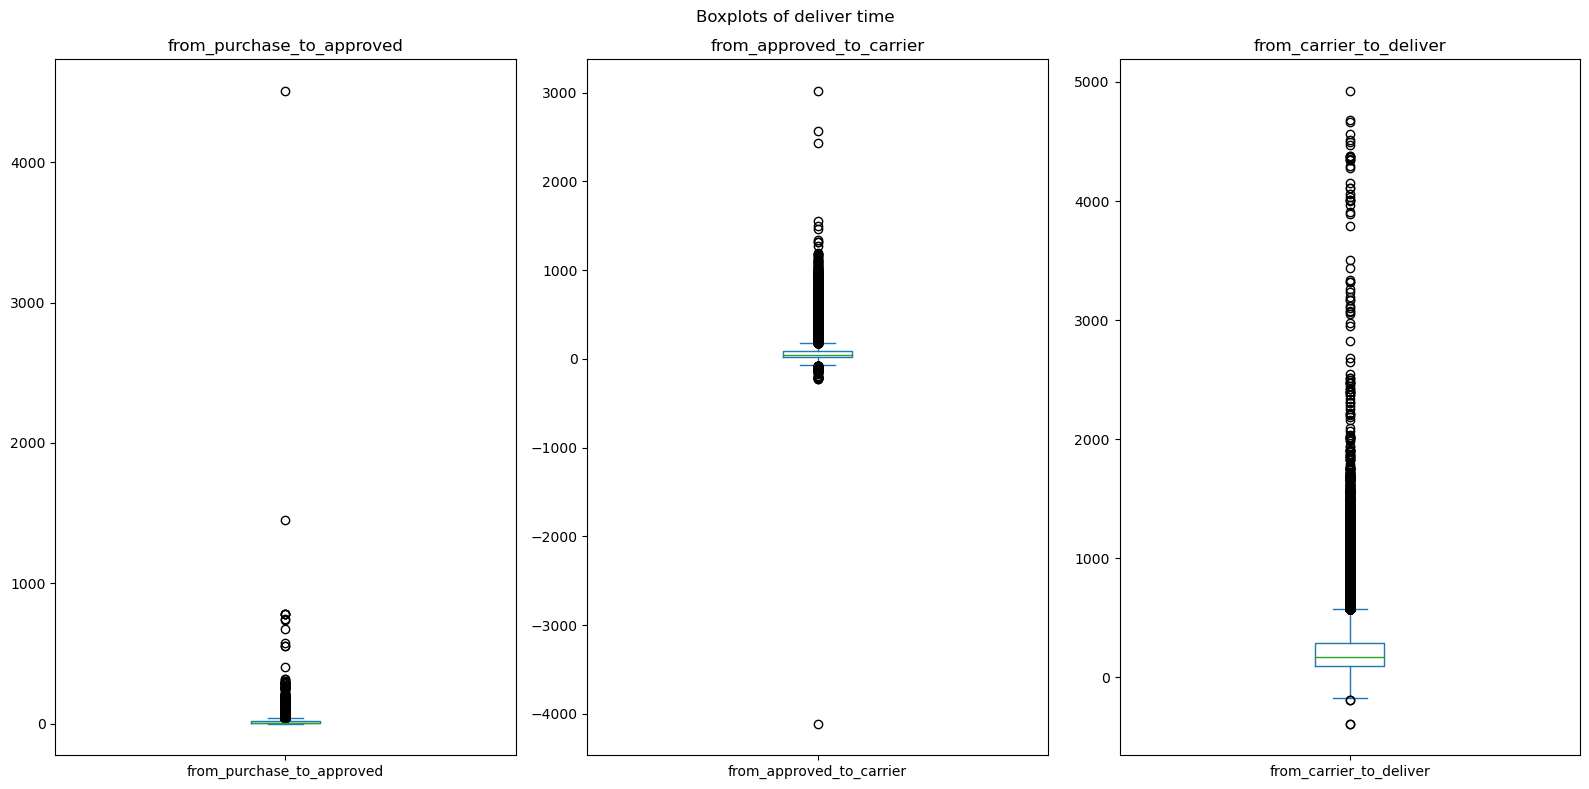

In [258]:
df_time = df[['from_purchase_to_approved','from_approved_to_carrier','from_carrier_to_deliver']]
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

for i, ax in enumerate(axes.flat):
    if i < len(df_time.columns):
        df_time[df_time.columns[i]].plot(kind='box', ax=ax)
        ax.set_title(df_time.columns[i])
    
plt.suptitle('Boxplots of deliver time')
plt.tight_layout()
plt.show()